In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

c:\Users\urban\OneDrive\Рабочий стол\timeseries_homework\venv\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [5]:
f1 = 'радость_10-2.wav'
f2 = 'Alesis-Fusion-Nylon-String-Guitar-C4.wav'
sample_rate_1, data_1 = wavfile.read(f1)
sample_rate_2, data_2 = wavfile.read(f2)

print("F1")
print('Sampling Rate:', sample_rate_1)
print('Audio Shape:', np.shape(data_1))
print
print("F2")
print('Sampling Rate:', sample_rate_2)
print('Audio Shape:', np.shape(data_2))

F1
Sampling Rate: 48000
Audio Shape: (177600, 2)
F2
Sampling Rate: 44100
Audio Shape: (97374, 2)


C:\Users\urban\AppData\Local\Temp\ipykernel_15932\121039549.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate_2, data_2 = wavfile.read(f2)


In [6]:
duration_1 = len(data_1) / sample_rate_1
time_1 = np.arange(0, duration_1, 1 / sample_rate_1) 

duration_2 = len(data_2) / sample_rate_2
time_2 = np.arange(0, duration_2, 1 / sample_rate_2) 

print(f"F1. длительность {duration_1} \n временная шкала {time_1}")
print(f"F2. длительность {duration_2} \n временная шкала {time_2}")



F1. длительность 3.7 
 временная шкала [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 3.69993750e+00
 3.69995833e+00 3.69997917e+00]
F2. длительность 2.208027210884354 
 временная шкала [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.20795918e+00
 2.20798186e+00 2.20800454e+00]


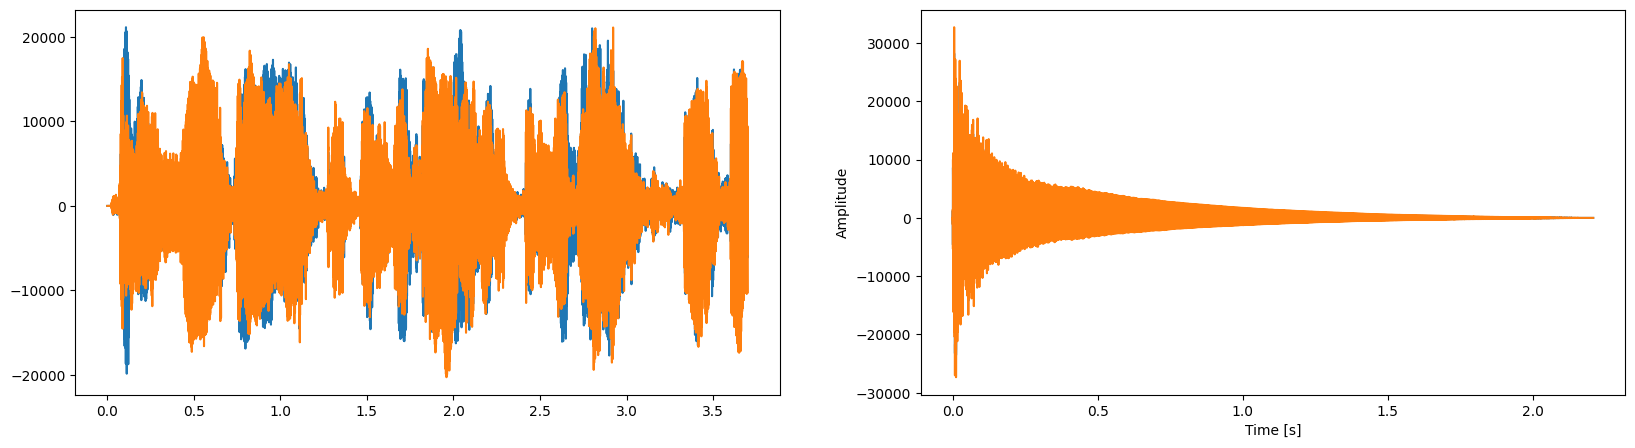

In [10]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time_1, data_1)
axs[1].plot(time_2, data_2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [11]:
sd.play(data_1[:, 0], sample_rate_1)
sd.wait()

In [35]:
sd.play(data_2[:, 0], sample_rate_2)
sd.wait()

#### Cпектральные характеристики

In [23]:
import librosa
from spafe.features.gfcc import gfcc

##### MFCC 

In [32]:
s1, sr1 = librosa.load(f1)
mfccs1 = librosa.feature.mfcc(y=s1, sr=sr1, n_mfcc=10)

s2, sr2 = librosa.load(f2)
mfccs2 = librosa.feature.mfcc(y=s2, sr=sr2, n_mfcc=10)

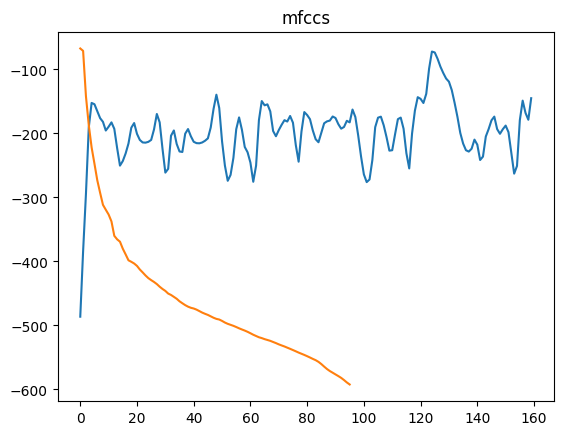

In [33]:
plt.plot(mfccs1[0])
plt.plot(mfccs2[0])
plt.title('mfccs')
plt.show()

##### GFCCS

In [34]:
s1, sr1 = librosa.load(f1)
gfccs1 = gfcc(s1, fs=sr1, num_ceps=1)

s2, sr2 = librosa.load(f2)
gfccs2 = gfcc(s2, fs=sr2, num_ceps=1)

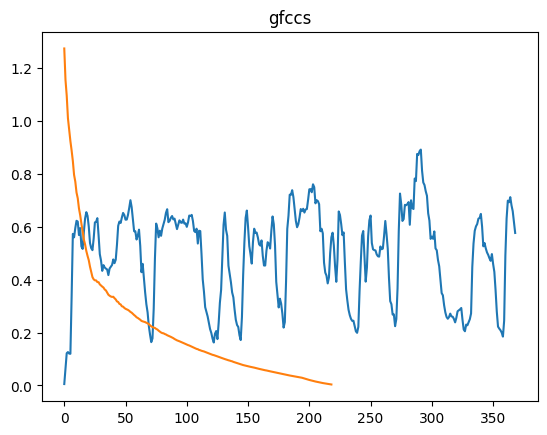

In [27]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

Графики ведут себя по разному, поэтому можно сказать, что звуки точни отличны друг от друга

#### Спектрограмма

C:\Users\urban\AppData\Local\Temp\ipykernel_15932\1479368565.py:4: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


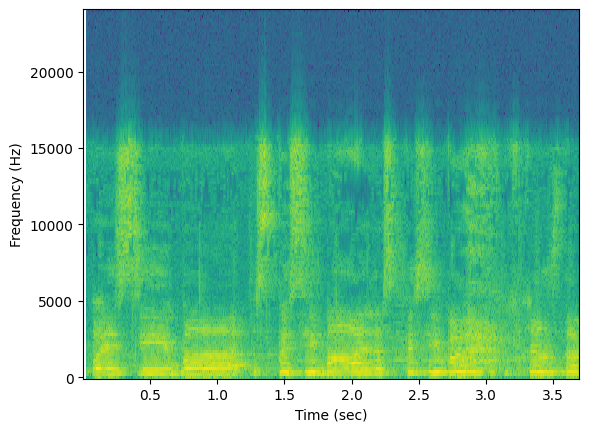

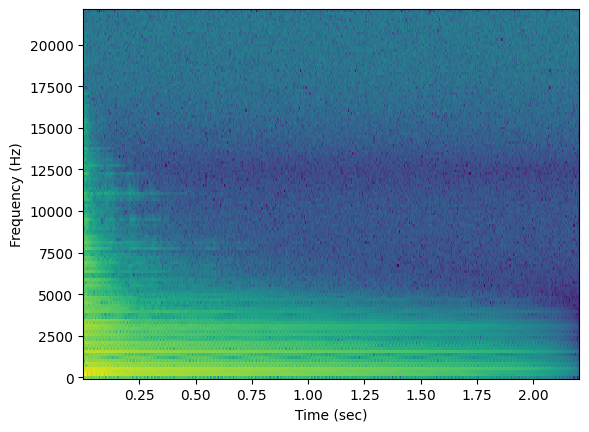

In [13]:
adata = data_1[:, 0]
s = sample_rate_1
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

adata = data_2[:, 0]
s = sample_rate_2
fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

Отличия звуков по преобладанию частот, у первого звука явно выраженные низкие и средние частоты, у первого же звука частоты более плавные